# Research for TA and Testing


In [1]:
import pandas as pd
import ccxt
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta
import tensorflow as tf
import joblib


# Data Collection


,date,open,high,low,close,volume,datetime
0,1577854800000,7198.52,7198.52,7198.52,7198.52,0.060000,2020-01-01 05:00:00
1,1577855100000,7200.59,7200.59,7200.59,7200.59,0.105825,2020-01-01 05:05:00
2,1577855400000,7200.00,7200.00,7200.00,7200.00,0.041522,2020-01-01 05:10:00
3,1577855700000,7200.00,7200.00,7197.94,7198.20,0.176478,2020-01-01 05:15:00
4,1577856000000,7198.20,7198.20,7198.20,7198.20,0.000000,2020-01-01 05:20:00
...,...,...,...,...,...,...,...
995,1578153300000,7309.43,7309.43,7309.43,7309.43,0.000000,2020-01-04 15:55:00
996,1578153600000,7310.24,7310.24,7295.39,7295.39,0.600828,2020-01-04 16:00:00
997,1578153900000,7302.63,7302.63,7302.63,7302.63,0.001388,2020-01-04 16:05:00
998,1578154200000,7302.63,7302.63,7302.63,7302.63,0.000000,2020-01-04 16:10:00


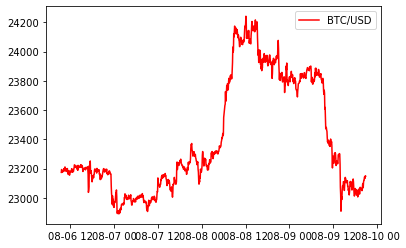

In [2]:
from datetime import datetime
from datetime import timedelta
exchange = ccxt.binanceus()


def get_data(start_date=None, timeframe='5m'):
    data = exchange.fetch_ohlcv(
        'BTC/USD', timeframe, limit=1000, since=start_date)
    df = pd.DataFrame(
        data, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    df['datetime'] = pd.to_datetime(df['date'], unit='ms')
    return df


df = get_data()
plt.plot(df['datetime'], df['close'], color='red')
plt.legend(['BTC/USD'])

# Fetch data since 1/1/2020


def convert_date(x): return datetime.strptime(x, '%Y-%m-%d')


n = convert_date('2020-01-01')
n = int(n.timestamp()) * 1000
df = get_data(start_date=n)

df


In [3]:
df = get_data()
MACD = ta.macd(df['close'], n_fast=12, n_slow=26, n_sign=9)
MACD


,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
995,16.657064,8.853023,7.804040
996,19.216687,9.130118,10.086570
997,20.284350,8.158224,12.126126
998,22.287284,8.128927,14.158357


In [4]:
df = get_data()
ta.stochrsi(df['close'], n=14)


,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
995,100.000000,94.142581
996,100.000000,99.833252
997,94.473300,98.157767
998,94.473300,96.315534


In [5]:
df = get_data()
bollinger = ta.bbands(df['close'], n=20, k=2)
bollinger


,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,23166.105774,23180.494,23194.882226,0.124141,0.311165
...,...,...,...,...,...
995,23064.010542,23112.010,23160.009458,0.415364,0.818337
996,23098.299286,23126.636,23154.972714,0.245057,0.789801
997,23112.105379,23132.144,23152.182621,0.173253,0.547558
998,23117.636703,23138.418,23159.199297,0.179626,0.816438


Text(0.5, 1.0, 'STOCHRSI')

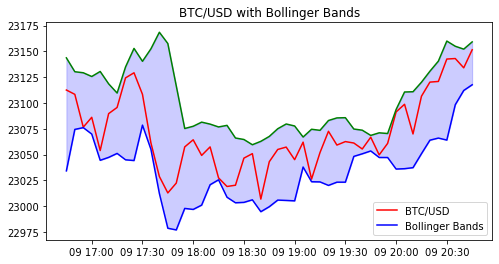

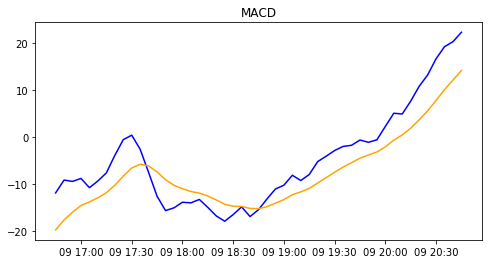

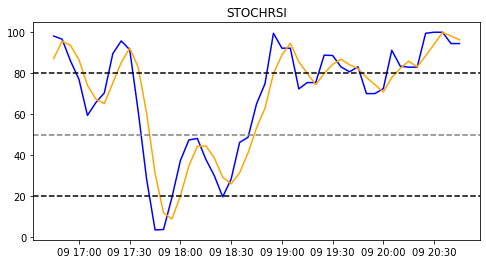

In [6]:
df = get_data()
MACD = ta.macd(df['close'], n_fast=12, n_slow=26, n_sign=9)
stochrsi = ta.stochrsi(df['close'], n=14)
bollinger = ta.bbands(df['close'], n=20, k=2)

plt.figure(figsize=(8, 4))
plt.plot(df['datetime'].iloc[-50:-1], df['close'].iloc[-50:-1], color='red')
plt.plot(df['datetime'].iloc[-50:-1],
         bollinger['BBL_5_2.0'].iloc[-50:-1], color='blue')
plt.plot(df['datetime'].iloc[-50:-1],
         bollinger['BBU_5_2.0'].iloc[-50:-1], color='green')
plt.fill_between(df['datetime'].iloc[-50:-1], bollinger['BBL_5_2.0'].iloc[-50:-1],
                 bollinger['BBU_5_2.0'].iloc[-50:-1], color='blue', alpha=0.2)
plt.legend(['BTC/USD', 'Bollinger Bands'])
plt.title('BTC/USD with Bollinger Bands')

plt.figure(figsize=(8, 4))
plt.plot(df['datetime'].iloc[-50:-1],
         MACD['MACD_12_26_9'].iloc[-50:-1], color='blue')
plt.plot(df['datetime'].iloc[-50:-1],
         MACD['MACDs_12_26_9'].iloc[-50:-1], color='orange')
plt.title('MACD')

plt.figure(figsize=(8, 4))
plt.plot(df['datetime'].iloc[-50:-1],
         stochrsi['STOCHRSIk_14_14_3_3'].iloc[-50:-1], color='blue')
plt.plot(df['datetime'].iloc[-50:-1],
         stochrsi['STOCHRSId_14_14_3_3'].iloc[-50:-1], color='orange')
plt.axhline(y=50, color='gray', linestyle='--')
plt.axhline(y=80, color='black', linestyle='--')
plt.axhline(y=20, color='black', linestyle='--')
plt.title('STOCHRSI')


# Ordering Algorithms

The strategy that will be implemented will be MACD focused with the confirmation from the STOCHRSI.  
<br>
If the difference of the MACD is positive, the strategy will be to buy the stock if the STOCHRSI is above the 50% level, indicating a strong trend. This will trigger an OCO order.
<br>
The stop loss will be set to -0.2% of the current price. and the Take-Profit will be 0.5% of the current price
<br>


# ML Integration

- Predict how much higher percentage the stock will be in 30 minutes.
  - Uses a Random Forest Classifier to predict the percentage increases.
  - Uses MACD, STOCHRSI, Volume, Bollinger Bands, and Close Price as features for linear regression to predict the next 30 minutes.


In [7]:
df = get_data()
df['MACD'] = ta.macd(df['close'], n_fast=12, n_slow=26,
                     n_sign=9)['MACDh_12_26_9']
df['STOCHRSIk'] = ta.stochrsi(df['close'], n=14)['STOCHRSIk_14_14_3_3']
df['STOCHRSId'] = ta.stochrsi(df['close'], n=14)['STOCHRSId_14_14_3_3']
df['BandWidth'] = ta.bbands(df['close'], n=20, k=2)['BBB_5_2.0']
# shift(-6) is 30 minutes in the future
df['Next-Close'] = df['close'].shift(-6)
df.dropna(inplace=True)

df


,date,open,high,low,close,volume,datetime,MACD,STOCHRSIk,STOCHRSId,BandWidth,Next-Close
33,1659788400000,23177.04,23192.20,23176.42,23180.20,6.061093,2022-08-06 12:20:00,1.369872,61.831960,61.719560,0.066620,23180.87
34,1659788700000,23180.71,23206.50,23175.86,23199.56,6.336987,2022-08-06 12:25:00,2.734333,71.953957,65.471721,0.140322,23181.37
35,1659789000000,23202.49,23209.40,23191.22,23194.42,4.026681,2022-08-06 12:30:00,3.159339,83.588849,72.458256,0.153686,23198.08
36,1659789300000,23193.02,23201.59,23185.48,23194.67,3.162403,2022-08-06 12:35:00,3.310011,91.975889,82.506232,0.158878,23204.71
37,1659789600000,23194.15,23194.15,23172.96,23175.19,8.332736,2022-08-06 12:40:00,2.014170,72.140399,82.568379,0.162002,23225.81
...,...,...,...,...,...,...,...,...,...,...,...,...
989,1660075200000,23060.80,23098.09,23059.00,23091.28,14.367599,2022-08-09 20:00:00,4.343817,72.457362,70.826424,0.250213,23142.57
990,1660075500000,23097.53,23107.03,23082.87,23098.70,20.464338,2022-08-09 20:05:00,5.713854,91.188530,77.889679,0.322279,23143.06
991,1660075800000,23100.81,23105.45,23058.79,23069.93,11.752737,2022-08-09 20:10:00,4.442800,83.428231,82.358041,0.319072,23134.05
992,1660076100000,23071.26,23106.51,23070.40,23106.51,6.468380,2022-08-09 20:15:00,5.743351,82.927986,85.848249,0.300268,23151.57


In [8]:
# df = get_data()
# df['MACD'] = ta.macd(df['close'], n_fast=12, n_slow=26,
#                      n_sign=9)['MACDh_12_26_9']
# df['STOCHRSIk'] = ta.stochrsi(df['close'], n=14)['STOCHRSIk_14_14_3_3']
# df['STOCHRSId'] = ta.stochrsi(df['close'], n=14)['STOCHRSId_14_14_3_3']
# df['BandWidth'] = ta.bbands(df['close'], n=20, k=2)['BBB_5_2.0']

# df


# # shift(-6) is 30 minutes in the future
# df['Next-Close'] = df['close'].shift(-6)
# df.dropna(inplace=True)
# features = df[['open', 'high', 'low', 'MACD', 'close','STOCHRSIk', 'STOCHRSId',
#                'BandWidth', 'volume']]
# labels = df['Next-Close']

# data = pd.concat([features, labels], axis=1)
# train_data = data.sample(frac=0.8, random_state=0)
# test_data = data.drop(train_data.index)
# train_features = train_data.drop('Next-Close', axis=1)
# train_labels = train_data['Next-Close']
# test_features = test_data.drop('Next-Close', axis=1)
# test_labels = test_data['Next-Close']
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=1, input_shape=[len(train_features.columns)])
# ])
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(train_features, train_labels, epochs=500,
#             validation_split=0.2, verbose=1)
# predictions = model.predict(test_features)

# model.save('btc_model.h5')
# # model = tf.keras.models.load_model('myModel.h5')


In [9]:
from sklearn.metrics import mean_squared_error
# import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# print(model.evaluate(test_features, test_labels))
# print('RMSE: ', np.sqrt(mean_squared_error(test_labels, predictions)))
# print('MAE: ', mean_absolute_error(test_labels, predictions))
# print('R2: ', r2_score(test_labels, predictions))


# Training and Testing

- Making four seperate algorithms for 5,10,20,30 minutes in the future
- Returns a dataframe with percentage increase and the time it was predicted.


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def convert_date(x): return int(
    datetime.strptime(x, '%Y-%m-%d').timestamp()*1000)


def convert_date_with_time(x): return int(
    datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp()*1000)


df = get_data()
df['MACD'] = ta.macd(df['close'], n_fast=12, n_slow=26,
                     n_sign=9)['MACDh_12_26_9']
df['STOCHRSIk'] = ta.stochrsi(df['close'], n=14)['STOCHRSIk_14_14_3_3']
df['STOCHRSId'] = ta.stochrsi(df['close'], n=14)['STOCHRSId_14_14_3_3']
df['BandWidth'] = ta.bbands(df['close'], n=20, k=2)['BBB_5_2.0']

df['FIVE_CLOSE'] = df['close'].shift(-1)
df['TEN_CLOSE'] = df['close'].shift(-2)
df['TWENTY_CLOSE'] = df['close'].shift(-4)
SHIFT = -6
# shift(-6) is 30 minutes in the future
df['THIRTY_CLOSE'] = df['close'].shift(SHIFT)
df.dropna(inplace=True)
SPLIT_RATIO = 0.6

features = np.array(df[['MACD', 'STOCHRSIk', 'STOCHRSId', 'BandWidth']])
labels = np.array(((df['THIRTY_CLOSE']-df['close'])/df['close'])*100)

five_Labels = np.array(((df['FIVE_CLOSE']-df['close'])/df['close'])*100)
ten_Labels = np.array(((df['TEN_CLOSE']-df['close'])/df['close'])*100)
twenty_Labels = np.array(((df['TWENTY_CLOSE']-df['close'])/df['close'])*100)
thirty_Labels = np.array(((df['THIRTY_CLOSE']-df['close'])/df['close'])*100)

train_features = features[:int(SPLIT_RATIO*len(features))]
test_features = features[int(SPLIT_RATIO*len(features)):]

train_labels = labels[:int(SPLIT_RATIO*len(features))]
test_labels = labels[int(SPLIT_RATIO*len(features)):]
# Create different models for each label
five_train_labels = five_Labels[:int(SPLIT_RATIO*len(features))]
five_test_labels = five_Labels[int(SPLIT_RATIO*len(features)):]
ten_train_labels = ten_Labels[:int(SPLIT_RATIO*len(features))]
ten_test_labels = ten_Labels[int(SPLIT_RATIO*len(features)):]
twenty_train_labels = twenty_Labels[:int(SPLIT_RATIO*len(features))]
twenty_test_labels = twenty_Labels[int(SPLIT_RATIO*len(features)):]
thirty_train_labels = thirty_Labels[:int(SPLIT_RATIO*len(features))]
thirty_test_labels = thirty_Labels[int(SPLIT_RATIO*len(features)):]


# Create a model for each label
five_model = RandomForestRegressor(n_estimators=100, random_state=0)
ten_model = RandomForestRegressor(n_estimators=100, random_state=0)
twenty_model = RandomForestRegressor(n_estimators=100, random_state=0)
thirty_model = RandomForestRegressor(n_estimators=100, random_state=0)


# Train the models
five_model.fit(train_features, five_train_labels)
ten_model.fit(train_features, ten_train_labels)
twenty_model.fit(train_features, twenty_train_labels)
thirty_model.fit(train_features, thirty_train_labels)


# Test the models
five_predictions = five_model.predict(test_features)
ten_predictions = ten_model.predict(test_features)
twenty_predictions = twenty_model.predict(test_features)
thirty_predictions = thirty_model.predict(test_features)


In [11]:
joblib.dump(five_model, "./five_model.joblib", compress=3)
joblib.dump(ten_model, "./ten_model.joblib", compress=3)
joblib.dump(twenty_model, "./twenty_model.joblib", compress=3)
joblib.dump(thirty_model, "./thirty_model.joblib", compress=3)


['./thirty_model.joblib']

In [12]:
def get_accuracy(test_labels, predictions, name=None):
    print(f'{name} MSE: {mean_squared_error(test_labels, predictions)}')
    print(f'{name} MAE: {mean_absolute_error(test_labels, predictions)}')
    print(f'{name} R2: {r2_score(test_labels, predictions)}')
    print(f'{name} RMSE: {np.sqrt(mean_squared_error(test_labels, predictions))}')


names = ['Five', 'Ten', 'Twenty', 'Thirty']
predictions = [five_predictions, ten_predictions,
               twenty_predictions, thirty_predictions]

for i in range(len(predictions)):
    get_accuracy(test_labels, predictions[i], names[i])


Five MSE: 0.10615708097047531
Five MAE: 0.2236628358179065
Five R2: -0.02437928715225368
Five RMSE: 0.3258175577995687
Ten MSE: 0.10945180970840294
Ten MAE: 0.22910434534381174
Ten R2: -0.05617228527413154
Ten RMSE: 0.33083501886650835
Twenty MSE: 0.1195201412030127
Twenty MAE: 0.2377175089555531
Twenty R2: -0.15332821820835973
Twenty RMSE: 0.3457168511990885
Thirty MSE: 0.13219767073496821
Thirty MAE: 0.24795337695916994
Thirty R2: -0.27566201399545465
Thirty RMSE: 0.3635899761200358


In [13]:
# Test loading the model
five_model = ten_model = twenty_model = thirty_model = None


In [21]:
from datetime import datetime


def predict_next_close(df):
    df['MACD'] = ta.macd(df['close'], n_fast=12, n_slow=26,
                         n_sign=9)['MACDh_12_26_9']
    df['macd_low'] = ta.macd(df['close'], n_fast=12, n_slow=26,
                             n_sign=9)['MACD_12_26_9']
    df['macd_high'] = ta.macd(df['close'], n_fast=12, n_slow=26,
                              n_sign=9)['MACDs_12_26_9']
    df['Trend'] = (df['macd_high'] <= 0) & (df['macd_low'] <= 0)
    df['Trend'] = df['Trend'].map({True: 'Below', False: 'Above'})
    df.drop(['macd_high', 'macd_low'], axis=1, inplace=True)
    df['200EMA'] = ta.ema(df['close'], n=200)
    df['STOCHRSIk'] = ta.stochrsi(df['close'], n=14)['STOCHRSIk_14_14_3_3']
    df['STOCHRSId'] = ta.stochrsi(df['close'], n=14)['STOCHRSId_14_14_3_3']
    df['BandWidth'] = ta.bbands(df['close'], n=20, k=2)['BBB_5_2.0']
    df['BuySignal'] = (df['close'] > df['200EMA'] & df['macd'] > 0 & df['STOCHRSId'] >= 50 & df['STOCHRSId'] >= 50)
    df.dropna(inplace=True)
    # df['FIVE_CLOSE'] = df['close'].shift(-1)
    # df['TEN_CLOSE'] = df['close'].shift(-2)
    # df['TWENTY_CLOSE'] = df['close'].shift(-4)
    # df['THIRTY_CLOSE'] = df['close'].shift(-6)

    five_model = joblib.load("./models/five_model.joblib")
    ten_model = joblib.load("./models/ten_model.joblib")
    twenty_model = joblib.load("./models/twenty_model.joblib")
    thirty_model = joblib.load("./models/thirty_model.joblib")

    five_predictions = five_model.predict(
        df[['MACD', 'STOCHRSIk', 'STOCHRSId', 'BandWidth']])
    ten_predictions = ten_model.predict(
        df[['MACD', 'STOCHRSIk', 'STOCHRSId', 'BandWidth']])
    twenty_predictions = twenty_model.predict(
        df[['MACD', 'STOCHRSIk', 'STOCHRSId', 'BandWidth']])
    thirty_predictions = thirty_model.predict(
        df[['MACD', 'STOCHRSIk', 'STOCHRSId', 'BandWidth']])
    df['5 Minutes'] = five_predictions
    df['10 Minutes'] = ten_predictions
    df['20 Minutes'] = twenty_predictions
    df['30 Minutes'] = thirty_predictions
    df['Average'] = (df['5 Minutes'] + df['10 Minutes'] +
                     df['20 Minutes'] + df['30 Minutes'])/4
    return df


def convert_date(x): return datetime.strptime(x, '%Y-%m-%d')


n = convert_date('2020-01-01')
n = int(n.timestamp()) * 1000
df = get_data()
predictions = predict_next_close(df)
df.to_csv('predictions.csv')


In [15]:
df = get_data()
predict_next_close(df)
profit = (df['Average'].iloc[-1] * (df['close'].iloc[-1]/100)) + \
    df['close'].iloc[-1]
stop_loss = min([df['5 Minutes'].iloc[-1], df['10 Minutes'].iloc[-1],
                df['20 Minutes'].iloc[-1], df['30 Minutes'].iloc[-1]])
stop_loss = stop_loss * (df['close'].iloc[-1]/100) + df['close'].iloc[-1]
print('Price: ', df['close'].iloc[-1])
print('Profit: ', profit)
print('Stop Loss: ', stop_loss)


Price:  23146.61
Profit:  23165.4069232533
Stop Loss:  23139.630306992934


In [16]:
# model_loss = model.evaluate(test_features, test_labels)
# print(model_loss)


# New Model to indicate momentum


In [17]:
# New model to indicate momentum bullish or bearish
df = get_data()
df['MACD'] = ta.macd(df['close'], n_fast=12, n_slow=26,
                     n_sign=9)['MACDh_12_26_9']
df['STOCHRSIk'] = ta.stochrsi(df['close'], n=14)['STOCHRSIk_14_14_3_3']
df['STOCHRSId'] = ta.stochrsi(df['close'], n=14)['STOCHRSId_14_14_3_3']
df['BandWidth'] = ta.bbands(df['close'], n=20, k=2)['BBB_5_2.0']
df['prev_rsik'] = df['STOCHRSIk'].shift(1)
df['prev_rsid'] = df['STOCHRSId'].shift(1)


In [18]:
# df = get_data()
# df['MACD'] = ta.macd(df['close'], n_fast=12, n_slow=26,
#                         n_sign=9)['MACDh_12_26_9']
# df['STOCHRSIk'] = ta.stochrsi(df['close'], n=14)['STOCHRSIk_14_14_3_3']
# df['STOCHRSId'] = ta.stochrsi(df['close'], n=14)['STOCHRSId_14_14_3_3']
# df['BandWidth'] = ta.bbands(df['close'], n=20, k=2)['BBB_5_2.0']

# data = pd.concat([df['MACD'], df['STOCHRSIk'], df['STOCHRSId'],
#                     df['BandWidth'], df['close'], df['volume']], axis=1)
# data.dropna(inplace=True)

# new_prediction = model.predict(data)
# pred_df = pd.DataFrame(new_prediction, columns=['Predictions'])
# pred_df.index = df.index[33:]
# data['Prediction'] = pred_df

# data


In [19]:
data['close'].iloc[-1], data['Prediction'].iloc[-1]


NameError: name 'data' is not defined